In [3]:
import numpy as np

## Setting up main functions

In [4]:
#manually adding dummyy features
def dummy_features(x):
    features = np.ones_like((x))
    return np.column_stack((features,x))

#defining cross entropy as in the book
def cross_entropy(y_true,y_prob):
    m = len(y_true)
    #for divide by zero error
    epsilon = 1e-7
    entropy = -np.sum(y_true*np.log(y_prob+epsilon))/m

    return entropy


def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
#converting y targets to one hot encoding by 
#setting number of classes, 10 for MNIST data set
def one_hot(y):
    number_classes = 10
    encoded = np.eye(number_classes)[y]
    return encoded

#training step
def gradient_descent(eta,epochs,X_bias,y_encoded):
    #setting theta to have propper shape and random values
    # there is a theta for every x per class which is 10
    theta = np.random.randn((X_bias.shape[1]),10)
    #setting minum amount of loss
    loss_intit = 1.8
    m = len(X_bias)
    for epoch in range(epochs):
        scores = X_bias @ theta
        probabilities = softmax(scores)
        loss = cross_entropy(y_encoded,probabilities)
        grad = (X_bias.T@(probabilities-y_encoded))/m

        theta-= eta*grad

        if loss < loss_intit:
            break

        else:
            print(f'Current Epoch: {epoch}')
            print(f'Current loss: {loss} ')
            print('\n')
    return theta

## Getting the data and setting up data vars

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame=False)

In [6]:
np.random.seed(42)

In [9]:
X, y = mnist.data,mnist.target
y = y.astype(np.uint8)
X_train, X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

#setting the bias and y-encoded
X_bias = dummy_features(X_train)
y_encoded = one_hot(y_train)



## Setting params for grad descent

In [10]:
eta = .5
epochs = 1500

theta = gradient_descent(eta,epochs,X_bias,y_encoded)

Current Epoch: 0
Current loss: 14.162195842777061 


Current Epoch: 1
Current loss: 13.754127780784744 


Current Epoch: 2
Current loss: 11.215834582053335 


Current Epoch: 3
Current loss: 9.331840194989157 


Current Epoch: 4
Current loss: 10.454274147179598 


Current Epoch: 5
Current loss: 11.40572932976077 


Current Epoch: 6
Current loss: 9.33677963967311 


Current Epoch: 7
Current loss: 7.9024114671371 


Current Epoch: 8
Current loss: 5.879208973671844 


Current Epoch: 9
Current loss: 7.71724575489225 


Current Epoch: 10
Current loss: 5.962552296055682 


Current Epoch: 11
Current loss: 4.637694267899024 


Current Epoch: 12
Current loss: 4.40030023960681 


Current Epoch: 13
Current loss: 4.531465821255267 


Current Epoch: 14
Current loss: 4.173106688590057 


Current Epoch: 15
Current loss: 3.6719775618825237 


Current Epoch: 16
Current loss: 3.7185366841878493 


Current Epoch: 17
Current loss: 3.4116389283102837 


Current Epoch: 18
Current loss: 3.4318127140417274 




In [11]:
theta

array([[-0.86407999,  0.59987517,  0.70060804, ...,  0.35028188,
         0.16969942, -0.52525378],
       [ 0.68987839, -1.34174717, -0.22545245, ..., -0.77906671,
         1.01700439, -1.02997836],
       [ 0.22430632,  0.46999874, -0.92967451, ..., -0.59736257,
        -1.38112155, -1.36963941],
       ...,
       [-0.75194162, -0.53161794, -0.2035224 , ...,  0.25728589,
        -1.05237202,  0.29131046],
       [ 0.16187083, -0.71805291,  1.19504976, ..., -0.07218341,
        -0.08054367,  1.06596507],
       [-1.41840433, -1.25155314,  0.77696336, ..., -0.63708118,
         0.45653317,  0.95364896]])

# Using theta to make predictions

In [12]:
def predict(X,theta):
    X_bias = dummy_features(X)
    score = X_bias @ theta
    probabilites = softmax(score)
    predictions = np.argmax(probabilites,axis=1)

    return predictions

In [13]:
predictions = predict(X_test,theta)

Label is 7
predicted value is: 7


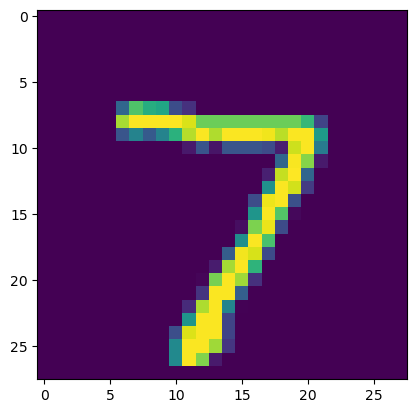

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape((28,28)))
print('Label is ' + f'{y_test[0]}')
print('predicted value is: ' + f'{predictions[0]}')

## Testing accuracy

In [15]:
correct = 0
#gets number of correct predctions
for i in range(len(y_test)):
    if (y_test[i] == predictions[i]):
        correct += 1

accuracy = correct/len(y_test) * 100

In [16]:
print(f'Final achived accuracy is: {accuracy.__round__(3)}%')

Final achived accuracy is: 89.64%
